<a href="https://colab.research.google.com/github/rohanroney/book_recommendation_system/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'blue'><b>Book Recommendation System

##<font color = 'blue'> <b>Problem Statement</b>
<font color = 'blue'>In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. <b>The main objective is to create a book recommendation system for users</b>.

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Path of data in drive
book_path='/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 3/Capstone Project - Book Recommendation System/dat/Books.csv'
ratings_path='/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 3/Capstone Project - Book Recommendation System/dat/Ratings.csv'
users_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 3/Capstone Project - Book Recommendation System/dat/Users.csv'


#Reading csv file
books=pd.read_csv(book_path)
ratings=pd.read_csv(ratings_path)
users=pd.read_csv(users_path)

## <font color = 'blue'> <b>Exploratory Data Analysis</b>

<font color = 'blue'> 1) Let us try and understand the <b>Books dataset</b> first.

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [ ]:
books.shape

(271360, 8)

<font color = 'blue'>There are a total of <b>8 variables</b> that and close to <b>271360 records</b>.

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


<font color = 'blue'>Checking the <b>Image-URL columns</b>.




In [ ]:
# Having a look at the "Image-URL-S data"
books['Image-URL-S'][0]

'http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg'

<font color = 'blue'>This information does not seem relevant at all for our recommender system. Hence decided to <b>drop these columns</b>.

In [ ]:
# Dropping the irrelevant features
books.drop(["Image-URL-S","Image-URL-M","Image-URL-L"],axis=1,inplace=True)

<font color='blue'> Now let us try and understand another feature called <b>Year-Of-Publication</b>. This is currently of object type. Checking what its values are:

In [ ]:
# Adjusting the column width to display full text of columns.
pd.set_option('display.max_colwidth',-1)

# Displaying the unique of year
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

<font color='blue'> Looks like publisher names <b>‘DK Publishing Inc’ and ‘Gallimard’ have been incorrectly loaded as Year-of-Publication</b> in dataset due to some errors. Also we need to convert the rest of the entries into numeric values as well.

In [ ]:
# Looking at entries with Year-Of-Publication as 'DK Publishing Inc'
books[books['Year-Of-Publication']=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [ ]:
# Correcting these entries

# Correcting year values
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000

# Correcting the Publisher Name
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"

# Correcting the Book-Author
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"

# Correcting the Book-Title
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"



In [ ]:
# Looking at entries with Year-Of-Publication as 'Gallimard'
books[books['Year-Of-Publication']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [ ]:
# Correcting this entry

# Correcting year value
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003

# Correcting the Publisher Name
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"

# Correcting the Book-Author
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"

# Correcting the Book-Title
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


<font color='blue'> Having a look at the corrected values:

In [ ]:
books[books['ISBN']=='2070426769']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard


In [ ]:
books[books['ISBN']=='078946697X']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc


In [ ]:
books[books['ISBN']=='0789466953']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc


<font color='blue'>Now that the entries are sorted out, <b>lets convert the rest of the Year values to numeric for our calculation purpose.

In [ ]:
# Converting object to numeric type
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'],errors='coerce')

<font color='blue'> Lets understand the top 10 publishers based on no. of books published.

                  Publisher  Count
0  Harlequin                 7535 
1  Silhouette                4220 
2  Pocket                    3905 
3  Ballantine Books          3783 
4  Bantam Books              3646 
5  Scholastic                3160 
6  Simon &amp; Schuster      2971 
7  Penguin Books             2844 
8  Berkley Publishing Group  2771 
9  Warner Books              2727  




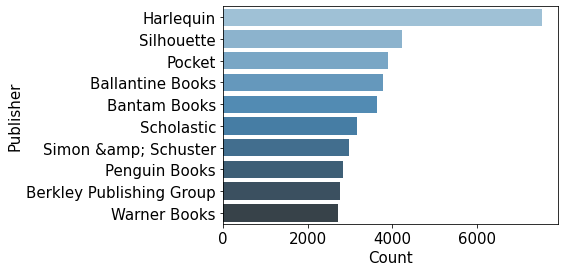

In [114]:
# Create a list of the top 10 publishers based on number of books published.
top_publishers = books['Publisher'].value_counts().head(10).reset_index().rename(columns={'index': 'Publisher','Publisher':'Count'})

# Print the value
print(top_publishers.head(10),"\n\n")

#Plot the result
sns.barplot(x="Count",y='Publisher', data=top_publishers,palette="Blues_d",)

<font color='blue'> Lets understand the top 10 authors based on number of books written.

                Author  Count
0  Agatha Christie      632  
1  William Shakespeare  567  
2  Stephen King         524  
3  Ann M. Martin        423  
4  Carolyn Keene        373  
5  Francine Pascal      372  
6  Isaac Asimov         330  
7  Nora Roberts         315  
8  Barbara Cartland     307  
9  Charles Dickens      302   




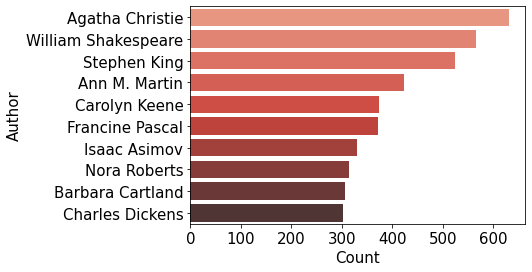

In [117]:
# Create a list of the top 10 authors based on number of books published.
top_authors = books['Book-Author'].value_counts().head(10).reset_index().rename(columns={'Book-Author':'Count','index':'Author'})

# Print the value
print(top_authors.head(10),"\n\n")

#Plot the result
sns.barplot(x="Count",y='Author', data=top_authors,palette="Reds_d",)

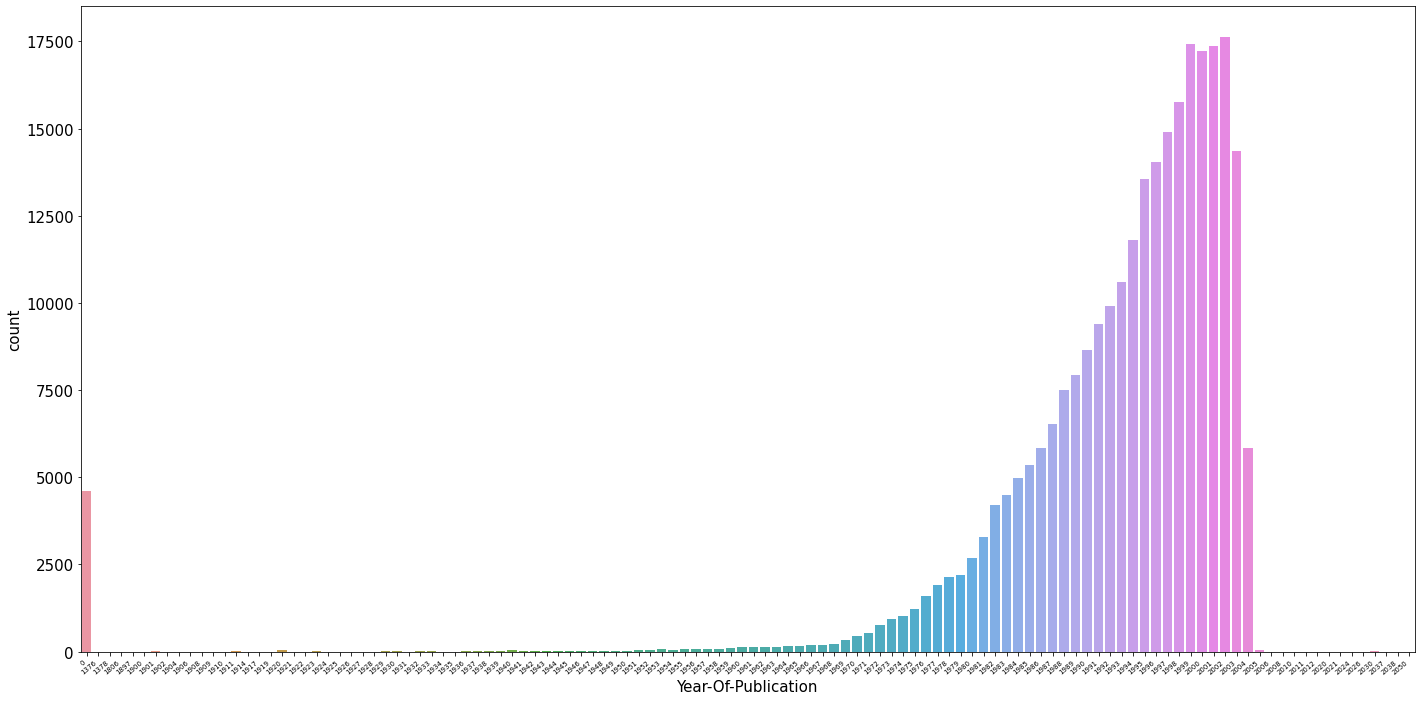

In [ ]:
# Understanding the distribution of the Year-of-Publication
plt.figure(figsize=(20,10)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x="Year-Of-Publication", data=books)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=7)
plt.tight_layout()
plt.show()

<font color='blue'> It can now be seen that <b>Year-of-Publication</b> is of type int and it has values ranging from 0–2050. We have to consider that any Year above 2006 is invalid. Also there are high number of 0 entries as well.

<font color='blue'>Since the distribution is skewed , replacing all the invalid data with NaN and then <b>replacing with median</b>.

In [71]:
# Replacing all anomaly values with nan
books.loc[(books['Year-Of-Publication']>2006)|(books['Year-Of-Publication']==0),'Year-Of-Publication'] = np.nan

In [72]:
# Computing with median values
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()),inplace=True)

In [74]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271360 non-null  object 
 1   Book-Title           271360 non-null  object 
 2   Book-Author          271359 non-null  object 
 3   Year-Of-Publication  271360 non-null  float64
 4   Publisher            271358 non-null  object 
dtypes: float64(1), object(4)
memory usage: 10.4+ MB


<font color='blue'> Imputing the 3 records which have null values for <b>Book-Author and Publisher</b>.

In [79]:
# Imputing the value for the null Author value
books.loc[books.ISBN == '9627982032','Book-Author'] = "David Tait"

In [78]:
# Imputing for the null Publisher values
books.loc[books.ISBN == '193169656X','Publisher'] = "Novelbooks Inc"
books.loc[books.ISBN == '1931696993','Publisher'] = "Bantam"

<font color = 'blue'> 2) Let us try and understand the <b>Ratings dataset</b>.

In [120]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [121]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [122]:
ratings.duplicated().sum()

0

<font color='blue'> Hence we can see that there are <b>no null values and no duplicates.

In [123]:
ratings.shape

(1149780, 3)

<font color='blue'> Lets have a look at the distribution of <b>Ratings</b>.

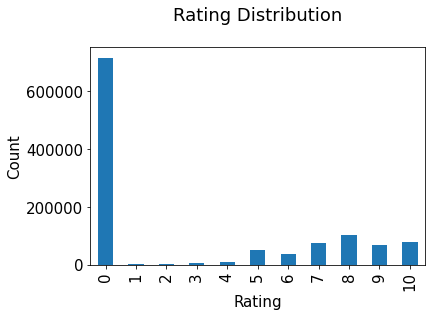

In [124]:
# Plotting the count distribution of Ratings
plt.rc("font", size=15)
ratings['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<font color='blue'>

In [125]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [126]:
users.shape

(278858, 3)

In [127]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


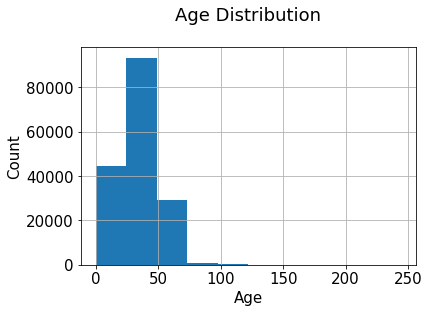

In [128]:
# Plotting the age distribution

users.Age.hist()
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

<font color='blue'> Here we do observe that age has a wide range of values starting from 0-250. Let us see how many records have values of users b/w 7-85.

In [129]:
print("The number of users b/w the ages of 7-85 is  ",len(users[(users['Age'] >= 7) & (users['Age'] <= 85)]))


The number of users b/w the ages of 7-85 is   166718


<font color='blue'> We do observe here that there are 1378 outlier values as well as 110762 null values associated to this feature. Hence we will have to look into outlier treatment as well as null value imputation.

In [130]:
def location(row):

  ''' To get the city,state and country values from the location feature'''

  try:

    location=[]
    location = row['Location'].split(', ')
    row['City'] = location[0]
    row['State'] = location[1]
    row['Country'] = location[2]
    return row

  except:

    return None


In [ ]:
users_updated =users.apply(location,axis=1)

In [69]:
users_updated.head()

,User-ID,Location,Age,City,State,Country
0,1.0,"nyc, new york, usa",NaN,nyc,new york,usa
1,2.0,"stockton, california, usa",18.0,stockton,california,usa
2,3.0,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4.0,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5.0,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom
